In [ ]:
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_=[]
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5], [3, 4]])
y = np.array([1, -1, 1, 1])
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Ërrors per epoch", model.errors_)

Prediction for new book [3, 2]: -1
Ërrors per epoch [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


1. The labels are fiction = +1 and non fiction = -1, so the prediction for [3.2] means the perceptron classified this book as non fiction.

2. 8

3. They dropped to 0 because by the 7th epoch, the perceptron found a seperating hyperplane that correctly classifies all training samples.This tells us that the data is linearly seperable.



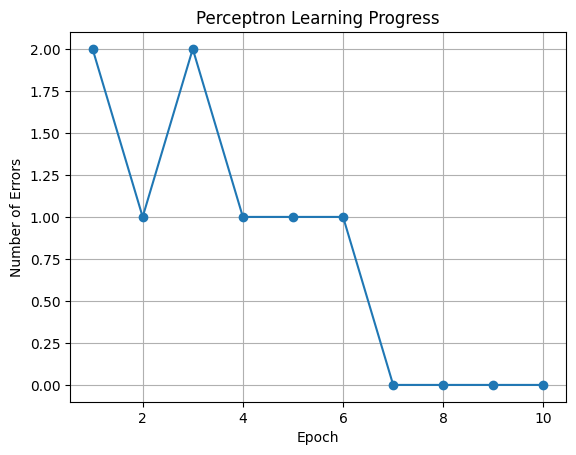

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

1. It fluctuates because the perceptron learns by trial and error, and small oscillations are normal before convergance.

2. It means the data is linearly seperable, so the algorithm can achieve perfect accuracy after enough updates.

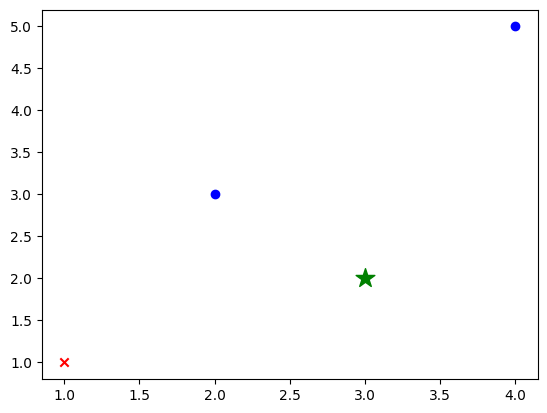

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[y ==1][:,0], X[y ==1][:,1], color='blue', marker='o', label='Fiction(+1)')
plt.scatter(X[y ==-1][:,0], X[y ==-1][:,1], color='red', marker='x', label='Non-Fiction(-1)')
plt.scatter([3], [2], color='green', marker= '*', s=200, label='New book[3,2]')


/tmp/ipython-input-856173910.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


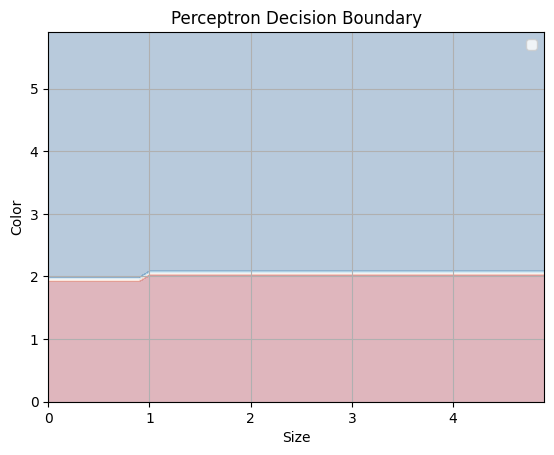

In [ ]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

1. The new book will be in the red region,Yes it falls on the non fiction side of the seperating line

2. In a straight line because the Perceptron is a linear classifier, on one side the blue region is for fiction (+1) and the other side is non fiction ,red (-1).

3. It would fall into the blue region ,the prediction would be fiction.


Case 1:eta= 0.01 , n_iter=20
Prediction for new book [3, 2]: -1
Ërrors per epoch [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]
plot = Errors decrease slowly, flattening out around epoch 10 or later.


Case 2: eta= 0.5, n_iter=5
Prediction for new book [3, 2]: -1
Ërrors per epoch [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]
Plot : Drops to 0 quickly but can oscillate more before stabilizing

1. eta= 0.01 learning is slower, errors decrease gradually.
  eta= 0.5 learning is fast errors drop quickly.

2. If the data is simple and linearly seperable even 5 epochs can reach 0 errors with a good learning rate.

3. No, Regardless of learning rate and epochs, the Perceptron eventually finds a separating line that puts [3, 2] on the non-fiction side.

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [2, 3]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([4.0, 1.0])))
print("Ërrors per epoch", model.errors_)

Prediction for new flower [4.0, 1.0]: 1
Ërrors per epoch [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


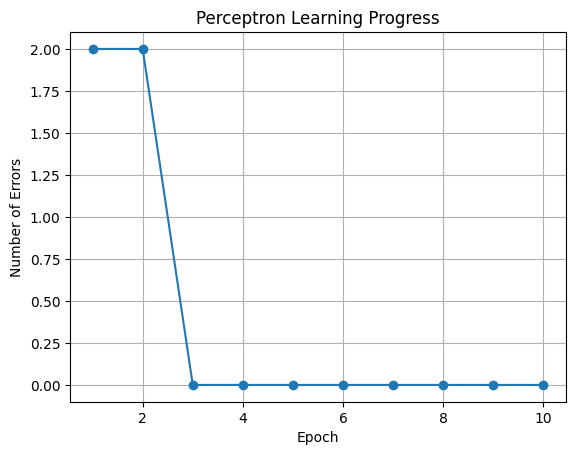

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

/tmp/ipython-input-856173910.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


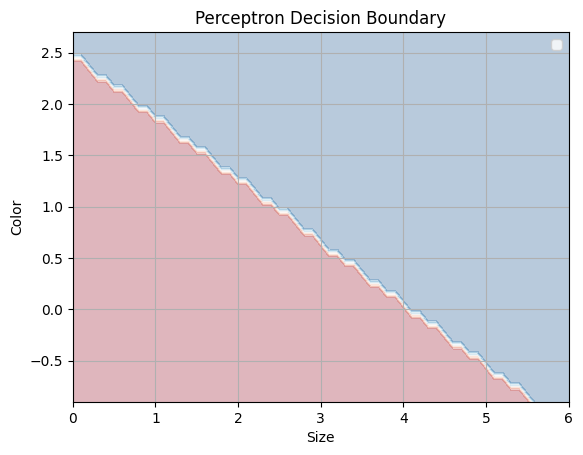

In [ ]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

1. Prediction = 1, the model predicts Versicolor.
2. Yes, because these two species are seperable by petal length/width.
3. It is still a straight line but it cuts through clusters in a way that seperates them.There is a clearer margin between Setosa and Versicolor. In the book dataset there are only 3 points, so the line is simple and easy to separate.

Bonus Challenge

The decision boundary moves slightly upward because there's now another positive example near [3, 4].The prediction for [3,2] is still non fiction.
With random state it changes the prediction to fiction and the errors per epoch fluctuate.


The Perceptron is a simple yet powerful linear classifier that updates its decision boundary through trial and error until it can separate classes. The robot librarian analogy helped me visualize this process: the librarian starts with random sorting rules and improves them based on mistakes, just like the Perceptron adjusts weights when it misclassifies data. I also observed how learning rate (eta) and the number of epochs (n_iter) affect the speed and stability of learning, how errors drop to zero when the model finds a perfect separating line, and how randomness and adding new data influence predictions.